<table style="background-color: transparent;">
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%" align="center"><font size="7" color="#7748a4"> Práctica 4. Algoritmos Cuánticos II</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">Computación Cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td width="100%"><font size="4" color="black">2025-2</font></td>
    </tr>
</table>

<p style="text-align:center; font-weight:bold;">Nombre del Alumno: Rosario Vázquez José André</p>
<p style="text-align:center; font-weight:bold;">Núm. Cuenta: 318353351

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\mymatrix}[2]{\left[ \begin{array}{#1} #2\end{array} \right]} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $

<a id="1"></a>
# Desarrollo

#### 1. Determina de qué tipo de función se trata: _constante_ o _balanceada_:

1. Ejecuta la siguiente celda de código, esta definirá una función llamada `oracledj(n)` que recibe `n` y devuelve un circuito cuántico aleatorio con `n+1` qubits correspondientes a una función constante o balanceada.
    - `oracledj(n)` representa $U_f$ en el algoritmo de Deutsch – Jozsa.
    - Dibuja el circuito que regresa la función `oracledj(n)`.
2. Usa $n=4$. Implementa el algoritmo de Deutsch – Jozsa completo para decidir si $f$ es constante o balanceada.
    - Considera que el qubit de más a la izquierda (en este caso $q_4$) es el qubit auxiliar (registro $|y\rangle$).
        - Nota que `oracledj(n)` tiene el qubit auxiliar del otro lado comparado con el ejemplo visto en este notebook (Lab4, sección 3).
    - Comprueba la estructura del circuito de $U_f$ dibujando tu circuito. ¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?
3. Realiza la simulación del circuito usando la clase `BasicSimulator` (como en el ejemplo de este Lab4).
    - Está prohibido usar Qiskit Aer (`qiskit-aer`). Muchos ejemplos en internet usan Qiskit Aer, pero no se puede usar en las tareas, así que realiza la adecuación pertinente del código.
4. Responde claramente de qué tipo de oráculo se trata: constante o balanceado.
    - Usa una celda de markdown.

##### Celda oculta que define la función `oracledj(n)`

No olvides ejecutar la siguiente celda de código ([ofuscado](https://es.wikipedia.org/wiki/Ofuscaci%C3%B3n#Motivaci%C3%B3n)) para cargar la función del Oracle.

In [1]:
exec(bytes.fromhex('0a696d706f72742072616e646f6d0a66726f6d207169736b697420696d706f7274205175616e74756d436972637569740a0a646566206f7261636c65646a286e293a0a20202020726573756c74203d205175616e74756d43697263756974286e2b31290a20202020726573756c742e6261727269657228290a0a2020202074797065203d2072616e646f6d2e63686f696365285b22636f6e7374616e74222c202262616c616e636564225d290a2020202069662074797065203d3d2022636f6e7374616e74223a0a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a20202020656c73653a0a2020202020202020636f6e74726f6c203d2072616e646f6d2e72616e6472616e6765286e290a2020202020202020726573756c742e637828636f6e74726f6c2c206e290a202020202020202069662072616e646f6d2e72616e6472616e6765283229203d3d20303a0a202020202020202020202020726573756c742e78286e290a0a20202020726573756c742e6261727269657228290a2020202072657475726e20726573756c740a20202020').decode('utf-8'))

##### Dibujando el circuito de la función `oracledj(n)`

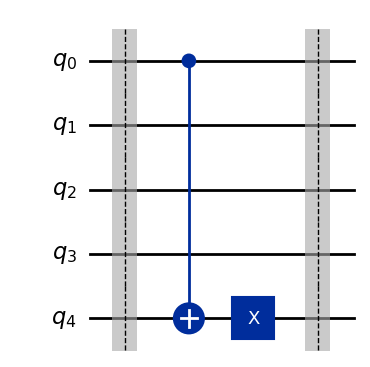

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
import random
import numpy as np

# Número de qbits para aplicar en el algoritmo 
n=4

oracle = oracledj(n)

oracle.draw('mpl')

##### Implementando el circuito del algoritmo Deutsch – Jozsa 

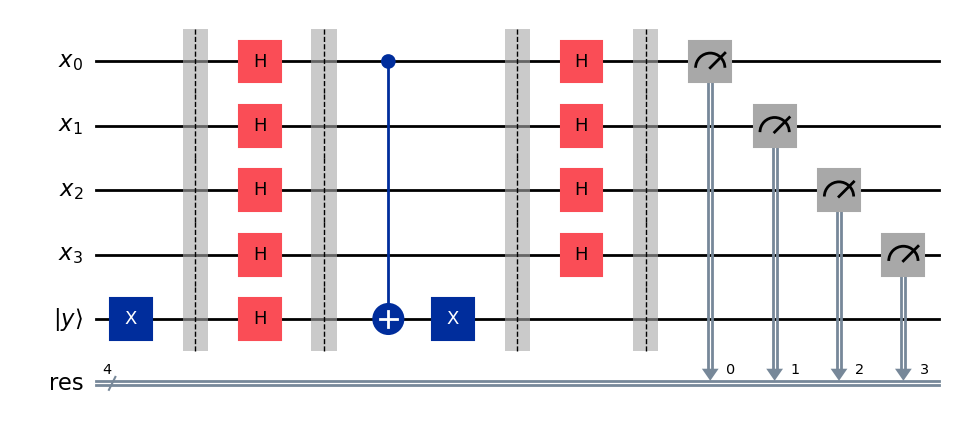

In [13]:
#Definicón de n qbits
x = QuantumRegister(n, '{x}')
y = QuantumRegister(1, '{|y\\rangle}')
#Definición de bits clásicos para n=4
r = ClassicalRegister(n, "res")

#n+1 = 5 qubits, n = 4 bits clásicos
dj_circuit = QuantumCircuit(x, y, r)         

#Paso 1: Preparando registros cunámticos
dj_circuit.x(y)   

#Paso 2: Aplicando la compuerta H (Hadamard) a cada qbit
dj_circuit.barrier()
dj_circuit.h(x)
dj_circuit.h(y)   # Aplicar H al segundo estado |1>, para cambiarlo al estado |->

#Paso 3: Aplicando el oraculo, para determinar si es balanceado o constante
dj_circuit_oraculo = dj_circuit.copy().compose(oracle)

#Paso 4: Aplicando Hadamard a cada qbit del primer registo (X[0],X[1],X[2])
dj_circuit_oraculo.h(x)
dj_circuit_oraculo.barrier()

#Paso 5:Mediciones en el registro X
dj_circuit_oraculo.measure(x,r)

#Dibujando circuitos
dj_circuit_oraculo.draw('mpl')

`¿Puedes comprobar si tu resultado es correcto (o no) solo observando este circuito?`

Sí, se puede determinar si la función es constante o balanceada observando las compuertas presentes en el circuito del oráculo. 

El oráculo tiene un mecanismo aleatorio para elegir si implementa una función constante o balanceada. Se obtiene una función **balanceada** cuando el circuito incluye una compuerta de control como $CNOT$. Esto significa que la salida del qubit auxiliar cambiará dependiendo del valor de un qubit de entrada: para la mitad de los valores de $x$, el qubit auxiliar no cambia, y para la otra mitad sí cambia. En algunos casos, también se puede aplicar una compuerta $X$ extra para modificar la salida de manera aleatoria.

Por otro lado, si la función es **constante**, el resultado es siempre $0$ o siempre $1$, sin importar la entrada $x$. Si $f(x) = 0$ para todos los casos, el oráculo no realiza ninguna operación sobre el qubit auxiliar. Si $f(x) = 1$ para todos los casos, se aplica una compuerta $X$ al qubit auxiliar para forzarlo a estar en el estado $\ket{1}$.

Por lo tanto, observando la estructura del circuito, se puede inferir si el oráculo representa una función constante o balanceada.  


##### Simulación del Circuito

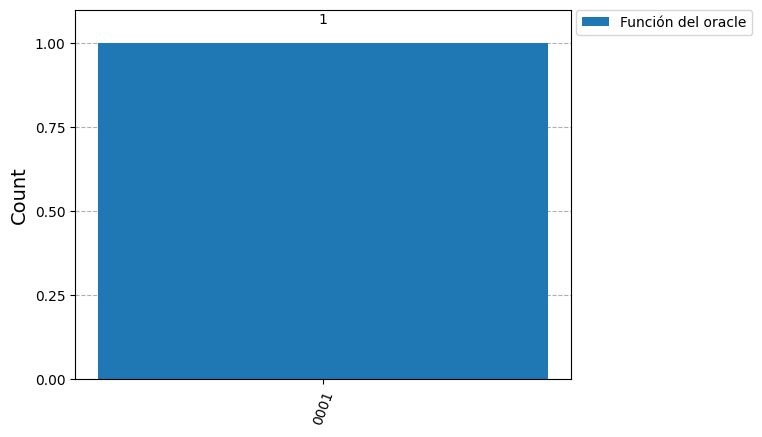

In [14]:
#Ver resultados del Oraculo
sim_basic = BasicSimulator()                       # usamos el simulador básico

# ejecutar el circuito, una sola vez es suficiente
job_sampler = sim_basic.run(dj_circuit_oraculo, shots=1)

conteos = job_sampler.result().get_counts()        # obtener los conteos

legend = ["Función del oracle"]
plot_histogram([conteos], legend=legend)

##### Responde claramente de qué tipo de oráculo se trata: constante o balanceado.

Para esta ejecución específica, el oráculo generado por la función `oracledj(n)` es **balanceado**.  

Esto se debe a que `oracledj(n)` selecciona aleatoriamente entre una función constante o balanceada en cada ejecución. En este caso particular, la randomización resultó en un oráculo balanceado, lo que se puede verificar observando la presencia de una compuerta de control, como $CNOT$, que introduce una dependencia entre los qubits de entrada y el qubit auxiliar.  

Es importante notar que, si se vuelve a ejecutar el código, el resultado podría cambiar, ya que la función `oracledj(n)` genera un oráculo distinto en cada ejecución.

#### 2. Aplica $H^{\otimes 4}$ a $\ket{15}$. ¿Cuál es el resultado?

1. Escribe tu respuesta mostrando todo el procedimiento.
    - El ejemplo en la sección 4 de este notebooks (Lab4) será de mucha utilidad.
    - Esta respuesta debe estar en el mismo notebook que entregues con el ejercicio 1.
2. Usa $\LaTeX$ para escribir las expresiones matemáticas.
    - Este y los demás notebooks tienen ejemplos de cómo se escriben estas expresiones, solo da doble click en la celda que quieras revisar.
    - En la segunda celda de este notebook hay unas definiciones que pueden ser de utilidad, cópialas en una celda al inicio de tu notebook para que las puedas usar.


Sea $\ket{x}=\ket{15}=\ket{1111}$, aplicar $H^{\otimes 4}$ a $\ket{x}$

Usamos la fórmula: $H^{\otimes 4} \ket{x} =\frac{1}{\sqrt{2^n}} \sum\limits_{z=0}^{2^n-1}(-1)^{x \cdot z} \ket{z}$

##### Desglosando la expresión Matemática (Fórmula)

$H^{\otimes 4} \ket{1111} = \frac{1}{4}((-1)^{(0000) \cdot (1111)} \ket{0000}+(-1)^{(0001) \cdot (1111)} \ket{0001}+(-1)^{(0010) \cdot (1111)} \ket{0010}+(-1)^{(0011) \cdot (1111)} \ket{0011}+(-1)^{(0100) \cdot (1111)} \ket{0100}$

$+(-1)^{(0101) \cdot (1111)} \ket{0101}+(-1)^{(0110) \cdot (1111)} \ket{0110}+(-1)^{(0111) \cdot (1111)} \ket{0111}+(-1)^{(1000) \cdot (1111)} \ket{1000}+(-1)^{(1001) \cdot (1111)} \ket{1001}$

$+(-1)^{(1010) \cdot (1111)} \ket{1010}+(-1)^{(1011) \cdot (1111)} \ket{1011}+(-1)^{(1100) \cdot (1111)} \ket{1100}+(-1)^{(1101) \cdot (1111)} \ket{1101}+(-1)^{(1110) \cdot (1111)} \ket{1110}+(-1)^{(1111) \cdot (1111)} \ket{1111})$

##### Manejos del los coeficientes

<table>
    <tr>
        <td align="center">$z$</td>
        <td align="center">$x\cdot z$</td>
        <td align="center">$(-1)^{x\cdot z}$</td>
    </tr>
    <tr>
        <td align="center">$0\to 0000$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$1\to 0001$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$2\to 0010$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$3\to 0011$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$4\to 0100$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$5\to 0101$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$6\to 0110$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$7\to 0111$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$8\to 1000$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$9\to 1001$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$10\to 1010$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$11\to 1011$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$12\to 1100$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
    <tr>
        <td align="center">$13\to 1101$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$14\to 1110$</td>
        <td align="center">$1$</td>
        <td align="center">$-1$</td>
    </tr>
    <tr>
        <td align="center">$15\to 1111$</td>
        <td align="center">$0$</td>
        <td align="center">$1$</td>
    </tr>
</table>


##### Tomando en cuenta los coeficientes, tenemos que:

$H^{\otimes 4} \ket{1111} = \frac{1}{4}\Big(\ket{0000}-\ket{0001}-\ket{0010}+\ket{0011}-\ket{0100}+\ket{0101}+\ket{0110}-\ket{0111}-\ket{1000}+\ket{1001}+\ket{1010}-\ket{1011}+\ket{1100}-\ket{1101}-\ket{1110}+\ket{1111}\Big)$

#### 3. Implementa el algoritmo de Deutsch usando `spinqit`. Simúlalo.

1. Escribe el código en `spinqit`.
    - Hay ejemplos de código con `spinqit` en el notebook del Lab2.
    - El algoritmo de Deutsch está completo en este mismo notebook (Lab4), solo hay que escribirlo ahora en `spinqit`.
      - Elije un solo oráculo (constante o balanceado).
2. Realiza la simulación en tu computadora usando `BasicSimulatorConfig` (como en los ejemplos).
   - Recuerda que debes tener un ambiente con Python 3.8 y el framework `spinqit` instalado.
4. Debes mostrar los resultados de este ejercicio 3 en el mismo notebook en el que están los resultados de los ejercicios 1 y 2.
   - Puedes hacer el ejercicio 1 en un ambiente de conda y guardar el notebook.
    - Luego abrir el notebook de nuevo en un segundo ambiente y realizar este ejercicio 3 en ese segundo ambiente, solo no toques las celdas de tus respuesta del ejercicio 1.

##### Implementación del algoritmo de Deutsch - Con un oráculo **constante**


Resultados de la medición:
{'01': 1}
{'00': 0.4999999999429258, '01': 0.5000000000570741}
[(-0.7071067811865476+0j), (0.7071067811865476+0j), 0j, 0j]



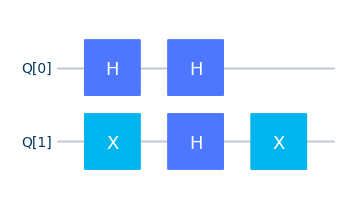

In [9]:
from spinqit import Circuit
from spinqit import H, X, CX
from spinqit import get_basic_simulator, get_compiler, BasicSimulatorConfig
from spinqit import draw
from spinqit.utils import print_circuit
import random

#Creando Circuito
circuit_deutsch = Circuit()
d = circuit_deutsch.allocateQubits(2)

#Implementado el algoritmo de Deutsch

#Donde d[1] es |y> y d[0] es |x>

#Paso 1 
circuit_deutsch << (X, d[1])

#Paso 2
circuit_deutsch << (H, d[0])
circuit_deutsch << (H, d[1])

#Paso 3 - Implementación del oráculo constante
if random.randrange(2) == 0:
    circuit_deutsch << (X, d[1])

#Paso 4 
circuit_deutsch << (H, d[0])

#Compilando Circuito
comp = get_compiler()
engine = get_basic_simulator()
exe = comp.compile(circuit_deutsch, 0)

#Viendo Circuito
draw(exe)

#Simulando Resultados 
config = BasicSimulatorConfig()
config.configure_shots(1)
result = engine.execute(exe, config)

#Obtener y mostrar resultados
print("\nResultados de la medición:")
print(result.counts)
#Obtener y mostar resultados
print(result.probabilities)
#Obtener y mostrar estados
print(result.states)
print()